<a href="https://colab.research.google.com/github/emmanuellaanggi/Machine-Learning-Explainability-of-Ecommerce-Sales/blob/master/Machine_Learning_Explainability_of_Sales_of_summer_clothes_in_E_commerce_Wish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using techniques from https://www.kaggle.com/learn/machine-learning-explainability and dataset from https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish. Explanation provided on my medium!

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d jmmvutu/summer-products-and-sales-in-ecommerce-wish
! unzip summer-products-and-sales-in-ecommerce-wish.zip

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('/content/summer-products-with-rating-and-performance_2020-08.csv')
data.head(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
data.countries_shipped_to.value_counts()

41    171
43    170
40    106
38     76
36     64
     ... 
67      1
66      1
65      1
64      1
6       1
Name: countries_shipped_to, Length: 94, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [6]:
print("Max. value data : ", data["units_sold"].max())
print("Min. value data : ", data["units_sold"].min())
print("Average. value data : ", data["units_sold"].mean())

Max. value data :  100000
Min. value data :  1
Average. value data :  4339.005085823268


In [7]:
data = data.dropna()

# **feature importance : permutation importance**

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

base_features = ["rating", "merchant_rating", "price", "retail_price", "uses_ad_boosts",
                 "badge_local_product",	"badge_product_quality", "badge_fast_shipping",
                 "countries_shipped_to", "merchant_has_profile_picture"]

y = data["units_sold"]

X = data[base_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = RandomForestRegressor(n_estimators=50, random_state=1).fit(train_X, train_y)

In [ ]:
! pip install eli5

In [39]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = base_features)

Weight,Feature
0.2319 ± 0.1603,countries_shipped_to
0.1010 ± 0.2580,price
0.0959 ± 0.1242,merchant_rating
0.0801 ± 0.0090,uses_ad_boosts
0.0626 ± 0.0741,retail_price
0.0099 ± 0.0064,badge_product_quality
0 ± 0.0000,merchant_has_profile_picture
0 ± 0.0000,badge_fast_shipping
0 ± 0.0000,badge_local_product
-0.0315 ± 0.1355,rating


# **partial dependence plots**

In [33]:
from sklearn.tree import DecisionTreeClassifier

base_features = ["rating", "merchant_rating", "price", "countries_shipped_to", "retail_price"]

X = data[base_features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)

In [ ]:
! pip install git+https://github.com/SauceCat/PDPbox

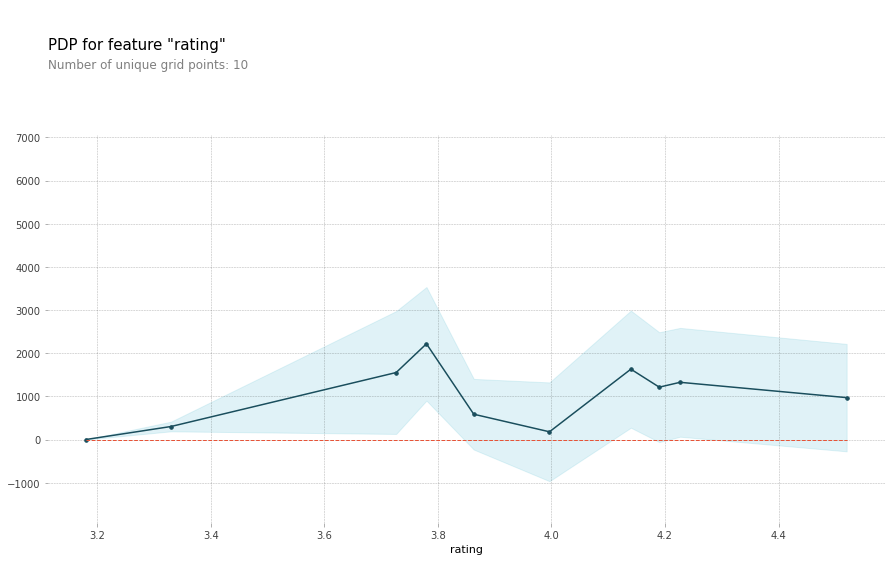

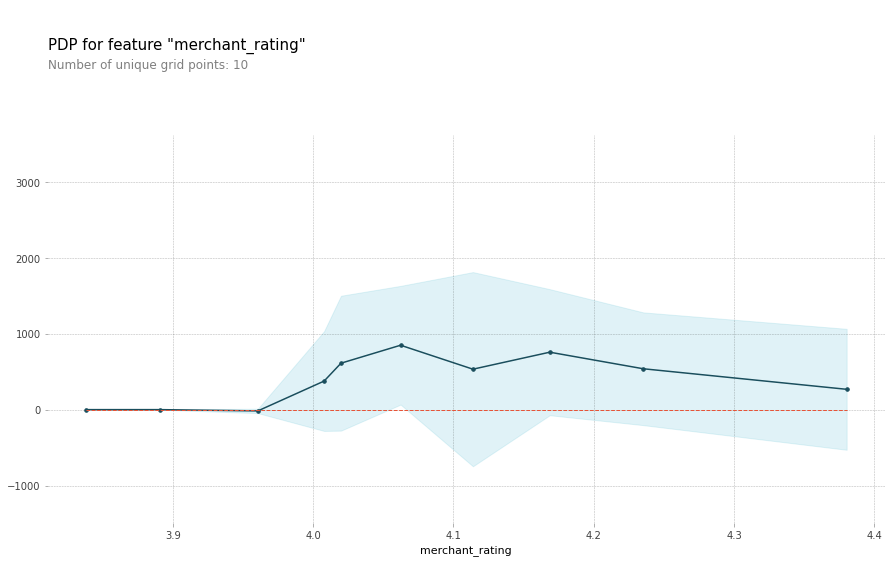

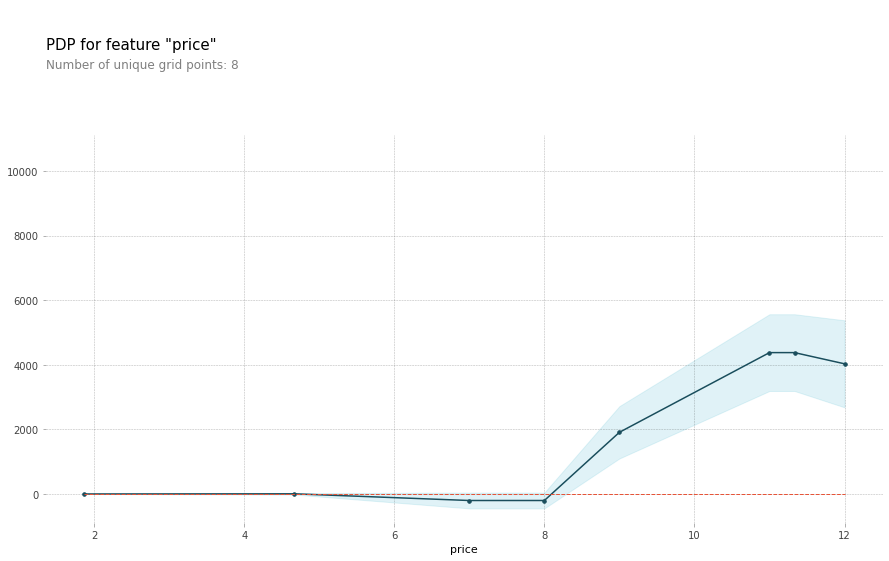

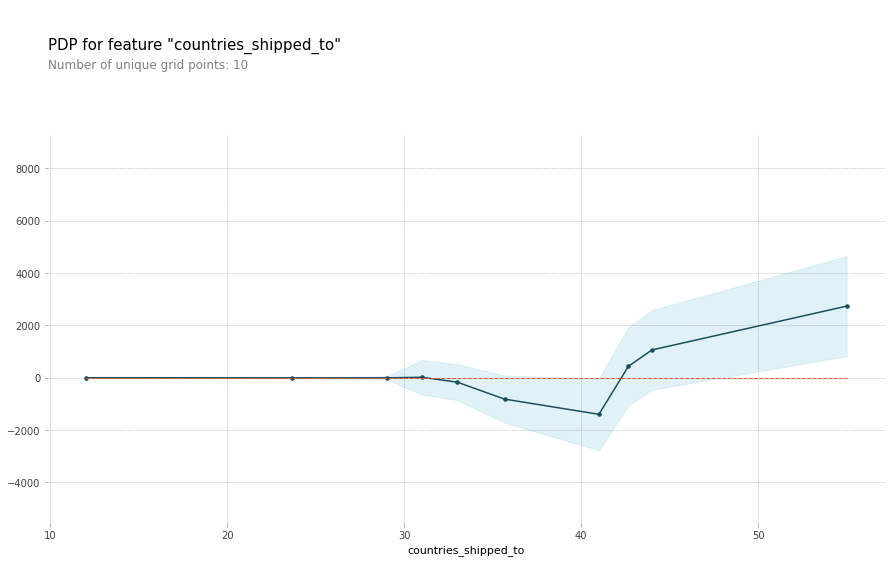

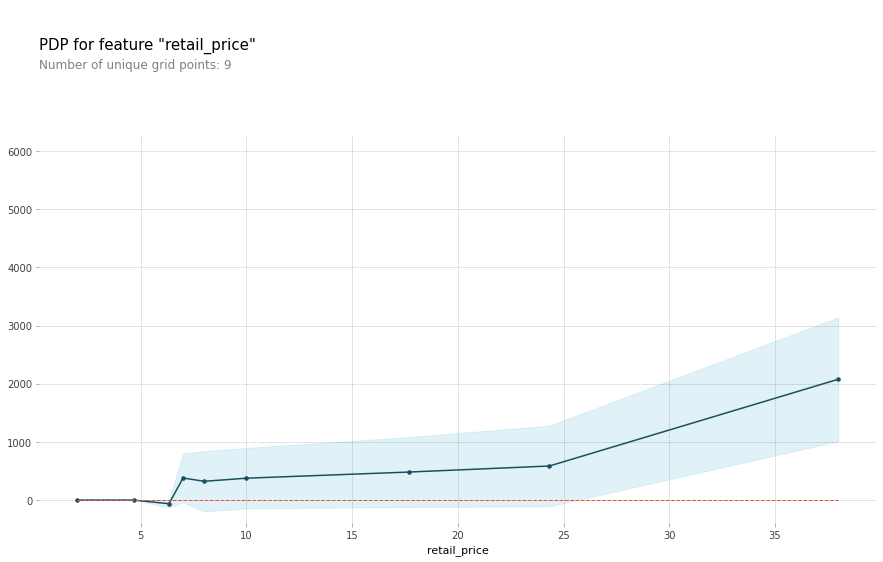

In [34]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X,
                               model_features=base_features, feature=feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

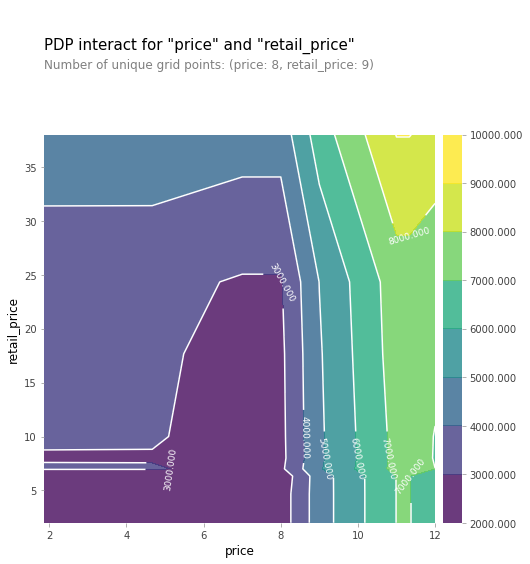

In [35]:

from pdpbox import pdp, get_dataset, info_plots

features_to_plot = ['price', 'retail_price']
inter1  =  pdp.pdp_interact(model=first_model, dataset=val_X, model_features=base_features, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

# **SHAP**

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

base_features = ["rating", "merchant_rating", "price", "countries_shipped_to"]

y = data["units_sold"]
X = data[base_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestClassifier(n_estimators=30, random_state=1).fit(train_X, train_y)

In [ ]:
! pip install shap

In [19]:
data_for_prediction = val_X.iloc[0]
data_for_prediction.values.reshape(1, -1)
data_for_prediction

rating                   3.740000
merchant_rating          3.954443
price                   11.000000
countries_shipped_to    41.000000
Name: 700, dtype: float64

In [32]:
import shap  

explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(val_X.iloc[0].values.reshape(1, -1))
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[0].values.reshape(1, -1))

# Summary Plot with SHAP

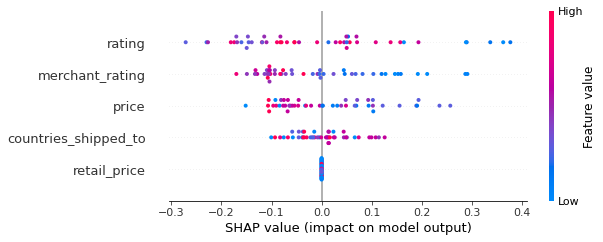

In [36]:
import shap  

explainer = shap.TreeExplainer(my_model)

shap_values = explainer.shap_values(train_X)
shap.summary_plot(shap_values[1], train_X)

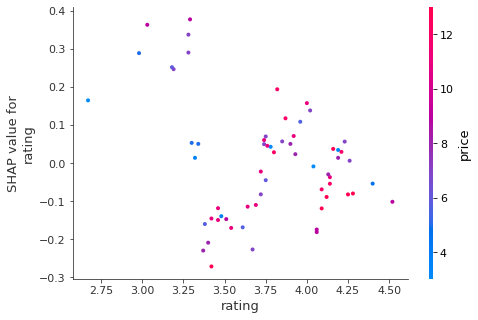

In [30]:
import shap  

explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X)

shap.dependence_plot('rating', shap_values[1], X, interaction_index="price")